In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)

In [9]:
df_wind = pd.read_excel("RE Data.xlsx", usecols = [1])

df_ghi = pd.read_excel("RE Data.xlsx", usecols = [2])

In [52]:
dataset_wind = df_wind.values
dataset_wind = dataset_wind.astype('float32')

In [13]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [53]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_wind = scaler.fit_transform(dataset_wind)

In [54]:

# split into train and test sets
train_size = int(len(dataset_wind) * 0.80)
test_size = len(dataset_wind) - train_size
train, test = dataset_wind[0:train_size,:], dataset_wind[train_size:len(dataset_wind),:]
print(len(train), len(test))

12268 3067


In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [55]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [56]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [57]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
 - 8s - loss: 0.0043
Epoch 2/5
 - 8s - loss: 0.0038
Epoch 3/5
 - 8s - loss: 0.0038
Epoch 4/5
 - 8s - loss: 0.0038
Epoch 5/5
 - 8s - loss: 0.0038


In [58]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.17 RMSE
Test Score: 0.19 RMSE


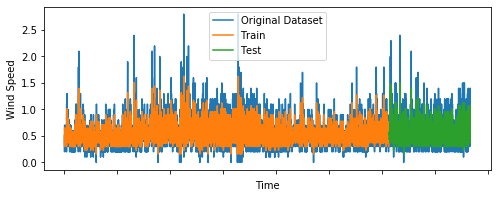

In [67]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset_wind)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_wind)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset_wind)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(8,3))
plt.plot(scaler.inverse_transform(dataset_wind), label = 'Original Dataset')
plt.plot(trainPredictPlot, label = 'Train')
plt.plot(testPredictPlot, label = 'Test')
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Wind Speed")
ax = plt.gca()
ax.xaxis.set_ticklabels([])
plt.show()

In [69]:
dataset_ghi = df_ghi.values
dataset_ghi = dataset_ghi.astype('float32')
dataset_ghi = scaler.fit_transform(dataset_ghi)

In [70]:
train_size = int(len(dataset_ghi) * 0.80)
test_size = len(dataset_ghi) - train_size
train, test = dataset_ghi[0:train_size,:], dataset_ghi[train_size:len(dataset_ghi),:]
print(len(train), len(test))

12268 3067


In [71]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [73]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
 - 9s - loss: 0.0148
Epoch 2/5
 - 8s - loss: 0.0109
Epoch 3/5
 - 8s - loss: 0.0108
Epoch 4/5
 - 8s - loss: 0.0109
Epoch 5/5
 - 8s - loss: 0.0108


In [74]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 111.42 RMSE
Test Score: 126.71 RMSE


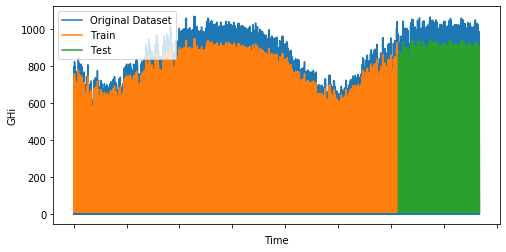

In [75]:
trainPredictPlot = np.empty_like(dataset_ghi)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_ghi)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset_ghi)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(8,4))
plt.plot(scaler.inverse_transform(dataset_ghi), label = 'Original Dataset')
plt.plot(trainPredictPlot, label = 'Train')
plt.plot(testPredictPlot, label = 'Test')
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("GHi")
ax = plt.gca()
ax.xaxis.set_ticklabels([])
plt.show()